### イベントが2つしか起こらない場合の分布：イメージするのはコイン投げ

確率統計学に初めて触れる際、最初に出会うのがコイン投げの例です。これは日常生活で簡単に体験できる「明白な」確率的なイベントの1つだからです。

**イメージとして：**
- コインを投げると、「表」と「裏」の2つの結果しかありません。
- つまり、2つの事象（成功または失敗）が繰り返される状況で、成功の回数を数える場合に注目するのが二項分布です。

### 二項分布の概要

**二項分布**は、ある試行において成功と失敗の2つの結果だけが考えられる場合に、一定回数の試行の中で成功する回数がどのような分布をするかを示すものです。

#### 二項分布の特徴
- **試行回数 (n)**：試行の総数を示します。
- **成功確率 (p)**：1回の試行で成功する確率を示します。
- **成功回数 (k)**：実際に成功した回数（x軸に該当）です。
- 各棒の高さ（確率密度）は、その成功回数が得られる確率を示します。

### 二項分布の例：コイン投げ
- コインを10回投げる（n=10）とします。
- 表が出る確率が0.5（p=0.5）の場合、表が出た回数がx軸に表示されます。
- 各棒の高さは、それぞれの表が出る回数が起こる確率を表しています。

#### 二項分布の応用と重要性
- 二項分布は、確率の基本的な考え方を学ぶための良い練習材料です。
- また、試行回数が増えると、二項分布は正規分布に近づくという性質があります（中心極限定理）。
  
このように、二項分布は初めて確率・統計を学ぶ際に重要な橋渡しの役割を果たします。理解を深めることで、より複雑な確率分布へもスムーズに進むことができます。

### イメージで理解する：二項分布の定義

**二項分布**は、n回の独立した試行が行われ、各試行の成功確率がpである場合の離散確率分布です。

#### 二項分布の確率質量関数の定義

二項分布の確率質量関数は以下の式で定義されます：

$$
Pr(K = k) = \binom{n}{k} p^k (1 - p)^{n - k}
$$

ここで、

- $ k = 0, 1, 2, \ldots, n $
- $\binom{n}{k} = \frac{n!}{k!(n-k)!}$ は二項係数（組み合わせ）です。

### kの意味

この式で一番理解しにくいのが「k」の意味かもしれません。二項分布では、特定の成功確率（p）を持つイベントをn回連続で独立に行うことを考えます。この分布は、そのn回の試行の中でk回の成功が起こる確率を示しています。

例えば、3回中2回成功する場合：

- (成功, 成功, 失敗)
- (成功, 失敗, 成功)
- (失敗, 成功, 成功)

これらの全てが3回中2回成功、1回失敗のケースに該当します。

### 例を通じた二項分布の理解

二項分布の意味を具体的に理解するために、コイン投げの例を考えましょう。コインを10回投げるとき、表が出る確率は0.5です。この場合、表が5回出る確率が最も高くなります。しかし、10回中4回や3回しか出ない場合もあり得ます。このように、二項分布は特定の確率pを持つ事象を連続してn回行ったときに、0からn回までの間で特定の回数成功する確率を示すものです。

### 二項分布の直接計算 (理論的確率)

10回のコイン投げについて、各成功回数に対する確率を計算します。計算結果は以下の通りです：

- $ k = 0: Pr(K = 0) = 0.0010 $
- $ k = 1: Pr(K = 1) = 0.0098 $
- $ k = 2: Pr(K = 2) = 0.0439 $
- $ k = 3: Pr(K = 3) = 0.1172 $
- ⋮
- $ k = 10: Pr(K = 10) = 0.0010 $

これらの確率をグラフに描くと、二項分布の形が視覚的に理解できます。このように二項分布は試行回数と成功確率によって形が決まることがわかります。


<ipython-input-2-227ecf83d2e4>:16: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(x, pmf_values, basefmt=" ", use_line_collection=True)


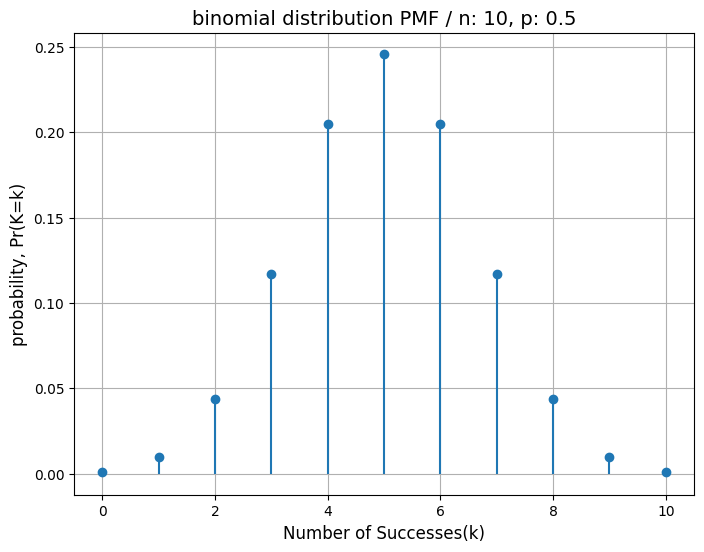

In [2]:
import matplotlib.pyplot as plt
from scipy.stats import binom

# パラメータの設定
n = 10  # 試行回数
p = 0.5  # 成功確率

# x軸の値（成功回数）
x = range(n + 1)

# 二項分布のPMFを計算
pmf_values = binom.pmf(x, n, p)

# グラフのプロット
plt.figure(figsize=(8, 6))
plt.stem(x, pmf_values, basefmt=" ", use_line_collection=True)
plt.xlabel('Number of Successes(k)', fontsize=12)
plt.ylabel('probability, Pr(K=k)', fontsize=12)
plt.title(f'binomial distribution PMF / n: {n}, p: {p}', fontsize=14)
plt.grid(True)

# グラフの表示
plt.show()


試行回数10、成功確率0.5の場合の多様な成功回数に対する確率に対する二項分布の形態

### コンピュータシミュレーションによる二項分布ヒストグラムの作成（経験的確率）

二項分布の形を確認するもう一つの方法は、コンピュータシミュレーションを使用することです。直接実験を行うことも可能ですが、時間がかかるため、シミュレーションで効率的に確認するのが良いでしょう。

#### シミュレーションの方法

1. **初期設定**: 0回成功から10回成功までのカウント数をすべて0に初期化します。
2. **コイントス**: コインを10回投げます。
3. **成功回数の計算**: 表が出た回数（成功回数）を数えます。
4. **カウントの更新**: 計算された成功回数に対応するカウントを+1します。例えば、成功回数が3回なら3回成功のカウントが+1増えます。
5. **繰り返し実行**: 上記の手順2〜4を何度も繰り返します。例えば、100回繰り返します。（繰り返し回数が多いほど、理論的な確率分布に近い結果が得られます。）

#### シミュレーション結果

以下の動画（またはヒストグラム）は、この方法でシミュレーションを行い、各成功回数のカウントを視覚的に示したものです。このヒストグラムは、二項分布の実際の形を経験的に確認するのに役立ちます。

シミュレーションによって得られたヒストグラムは、理論的に計算された二項分布の形に類似しており、これにより二項分布がどのように形成されるかについて直感的に理解する助けとなります。

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


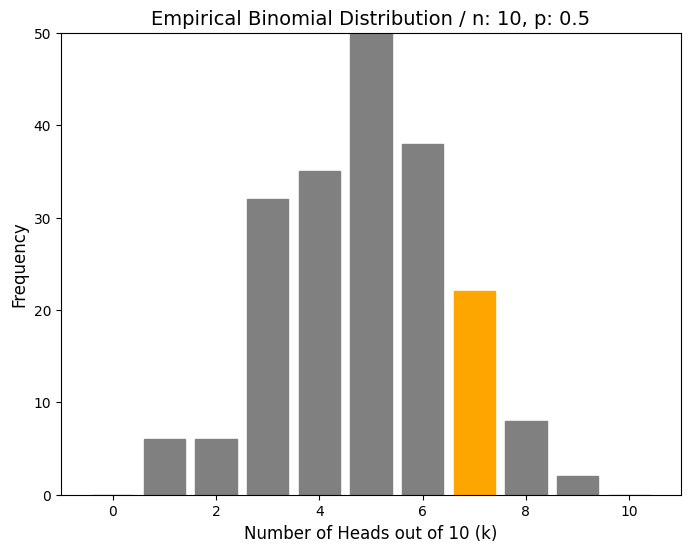

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import random

from google.colab import drive
drive.mount('/content/drive')


# パラメータの設定
n = 10  # 試行回数
p = 0.5  # 成功確率
num_trials = 100  # シミュレーションの回数

# シミュレーションデータを生成
results = [np.random.binomial(n, p) for _ in range(num_trials)]
unique, counts = np.unique(results, return_counts=True)
counts_dict = dict(zip(unique, counts))

# グラフの準備
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_xlim(-1, n + 1)
ax.set_ylim(0, 50)
ax.set_xlabel('Number of Heads out of 10 (k)', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.set_title(f'Empirical Binomial Distribution / n: {n}, p: {p}', fontsize=14)
bars = ax.bar(range(n + 1), [0] * (n + 1), color='gray')

# アニメーション更新関数
def update(frame):
    if frame < len(results):
        k = results[frame]
        counts_dict[k] = counts_dict.get(k, 0) + 1
        for i, bar in enumerate(bars):
            bar.set_height(counts_dict.get(i, 0))
            bar.set_color('orange' if i == k else 'gray')
    return bars

# アニメーションの作成と保存
ani = FuncAnimation(fig, update, frames=num_trials, repeat=False, blit=False)
ani.save('/content/drive/MyDrive/Colab Notebooks/binomial_simulation.gif', writer='imagemagick', fps=10)

plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


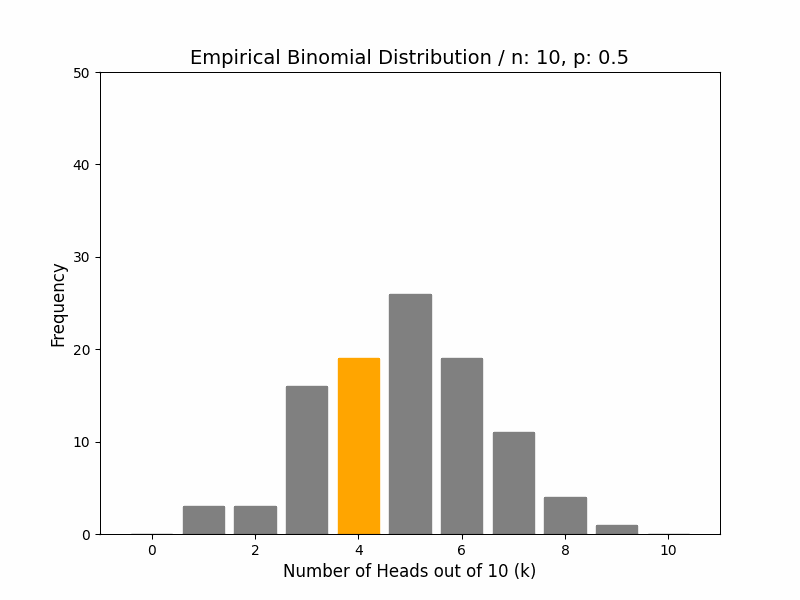

In [6]:
from google.colab import drive
drive.mount('/content/drive')

from IPython.display import Image
Image(filename='/content/drive/MyDrive/Colab Notebooks/binomial_simulation.gif')

### 二項分布の特性

二項分布を扱う際に知っておくと良い重要な特性には、二項分布の平均、分散、そしてどの条件で正規分布に近似されるかがあります。

#### 二項分布の平均と分散

試行回数が $ n $、成功確率が $ p $ である二項分布に従うランダム変数 $ K $ について、平均と分散は以下のように定義されます。

- 平均値:

$$
E(K) = np \quad (8)
$$

- 分散値:

$$
\text{Var}(K) = np(1 - p) \quad (9)
$$

平均に関して直感的に考えると、 $ n $ 回試行し、成功確率が $ p $ であるなら、平均的に $ np $ 回成功するのが妥当です。例えば、コインを100回投げた場合、50回表が出ると考えるのが一般的です。

もう少し深く考えると、期待値の線形性を利用して平均を導出できます。各試行の結果の合計が $ K $ の値になるため、

$$
K = K_1 + K_2 + \cdots + K_n \quad (10)
$$

となります。したがって、

$$
E[K] = E[K_1 + K_2 + \cdots + K_n] = E[K_1] + E[K_2] + \cdots + E[K_n] \quad (11)
$$

各試行の期待値は $ p $ であるため、

$$
E[K] = \sum_{i=0}^{n} E[K_i] = \sum_{i=0}^{n} p = np \quad (12)
$$

と考えられます。

分散の定義は以下の通りです。

$$
\text{Var}(K) = \sum_i p_i (k_i - \mu)^2 \quad (13)
$$

このとき、平均値を導出したのと同様に、 $ n $ 回の各試行について考えると、結果（ $ k_i $ ）は1または0であり、1が出る確率は $ p $、0が出る確率は $ 1 - p $ であることがわかります。1回の試行の期待値 $ \mu = p $ ですので、分散の定義から、

$$
(1 - p)(0 - p)^2 + p(1 - p)^2 = p^2(1 - p) + p(1 - 2p + p^2) \quad (14)
$$

$$
= p^2 - p^3 + p(1 - 2p + p^2) = p^2 - 2p^2 + p \quad (15)
$$

$$
= p(1 - p) \quad (16)
$$

となります。

したがって、 $ n $ 回独立に試行した場合の分散は、各試行の分散の合計に等しいため、

$$
\sigma_n^2 = \sum_{i=1}^{n} \sigma^2 = np(1 - p) \quad (17)
$$

#### 二項分布の正規分布近似

本ポスティングの最初にあるアプレットのスライダーを操作すると、二項分布がベル型（正規分布）に近似する様子が見られます。二項分布は試行回数 $ n $ が大きく、成功確率 $ p $ が0.5に近い場合、正規分布に近似されることが知られています。


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom
import ipywidgets as widgets
from ipywidgets import interact

# インタラクティブにグラフを表示する関数
def plot_binomial_distribution(n, p):
    # x軸の範囲を設定
    x = np.arange(0, n + 1)
    # 二項分布の確率質量関数（PMF）を計算
    pmf_values = binom.pmf(x, n, p)

    # グラフのプロット
    plt.figure(figsize=(8, 6))
    plt.stem(x, pmf_values, basefmt=" ", use_line_collection=True)
    plt.xlabel('k', fontsize=12)
    plt.ylabel('Pr(K=k)', fontsize=12)
    plt.title(f'Binomial Distribution PMF / n: {n}, p: {p}', fontsize=14)
    plt.grid(True)
    plt.ylim(0, 0.35)  # y軸の範囲を固定して見やすく調整
    plt.show()

# スライダーの設定
n_slider = widgets.IntSlider(value=10, min=1, max=100, step=1, description='n (試行回数)')
p_slider = widgets.FloatSlider(value=0.5, min=0.01, max=1.0, step=0.01, description='p (成功確率)')

# インタラクティブなプロットの表示
interact(plot_binomial_distribution, n=n_slider, p=p_slider)


interactive(children=(IntSlider(value=10, description='n (試行回数)', min=1), FloatSlider(value=0.5, description='…

<function __main__.plot_binomial_distribution(n, p)>

### 二項分布の正規分布近似

二項分布は特定の条件下で、正規分布のような鐘形（ベルシェイプ）に近い形状を示す場合があります。


しかし、$ n $が小さすぎたり、$ p $が極端に小さかったり大きかったりする場合、二項分布の形状は正規分布に似ているとは言えません。

二項分布が正規分布の形状を示すには、$必要があることがわかります。

数学者たちは、二項分布が正規分布に近似できる条件として、$ np $と$ \sqrt{np(1 - p)} $がそれぞれ5以上であることを挙げています。この条件を満たす場合、二項分布は平均が$ np $、分散が$ np(1 - p) $の正規分布に近似すると見なすことができます。